In [150]:
import pandas as pd
import numpy as np

credit = pd.read_csv("/content/drive/MyDrive/IEORE4721/data4columbia_credit.csv")
credit.columns = ['company','date', 'data']
credit.date = pd.to_datetime(credit.date)
pivot_credit = pd.pivot_table(credit, values="data", index="date", columns="company")
pivot_credit = pivot_credit.fillna(0)

data = pivot_credit["fbf6609a606c"]
data = data.reset_index()
data = data.rename(columns={"date":"ds", "fbf6609a606c":"y"})
actual = data.copy()
data.head()

,ds,y
0,2016-01-01,230.716251
1,2016-01-02,344.475680
2,2016-01-03,290.934482
3,2016-01-04,165.729834
4,2016-01-05,134.462727


In [151]:
pivot_credit

company,049fd91f3b99,07cdb4720792,0c228e9c216d,14df23d5c670,1bf8650b1b9b,22328d65a8ae,23f7ce412c07,2ff31a494062,3aa454f3dac8,3b96a09269c5,...,dfe2fbf1ed01,e2415cb7f63d,e4cf8ab67d58,ef1bcca724f3,f574a75b2605,f691ff3eb11b,f726f3251b6d,fa56db6320bb,fbf6609a606c,fdfb7a6e49cf
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1738.126440,441.698041,4808.804135,3619.502495,0.000000,183.407654,3001.096379,31604.70804,30204.031510,9437.995940,...,181501.8496,6.296834,44483.05857,266648.9245,15.665007,0.000000,108898.74790,7398.031942,230.716251,11819.556170
2016-01-02,728.823738,497.599602,58606.867840,4196.007556,0.000000,330.792689,3063.236190,44790.78786,39128.534400,16635.573490,...,190782.1679,151.188649,99125.03175,330109.9613,23.660173,0.000000,132499.17670,15612.896900,344.475680,21498.774190
2016-01-03,1845.640024,747.627955,30501.588390,4077.775784,0.000000,129.681621,2137.870792,42742.44125,21979.362930,22021.217340,...,231482.3076,232.252711,50574.62854,248299.8272,13.096875,0.000000,123160.26180,21691.783740,290.934482,9535.244815
2016-01-04,1280.107957,705.976698,62079.857220,1922.954450,1147.718547,199.592217,497.250364,29114.35058,26377.414540,13488.707560,...,246606.3886,1063.217137,57086.24159,146428.3396,7.509170,0.000000,80028.25964,51600.912790,165.729834,4266.290492
2016-01-05,1440.538036,550.896141,47553.025210,2730.244621,0.000000,167.061263,2044.203574,29601.79973,27369.881560,9492.121485,...,256720.4474,1249.220373,49998.52606,146854.8155,9.757260,0.000000,55787.77757,35819.527310,134.462727,5838.360140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06,1437.347645,464.971269,69555.071180,-124.775808,0.000000,242.574855,7013.699557,84670.02907,3050.010944,6275.123069,...,891444.9990,890.458833,37123.59898,608335.2922,15.637514,0.000000,149018.07530,30012.030310,295.392166,1032.786586
2022-11-07,1601.215296,456.181853,166365.924600,139.518710,3405.072489,220.006639,7570.946548,61032.07451,0.000000,4935.035492,...,942398.3733,1233.454763,27948.99749,295437.1084,21.702257,0.000000,119424.04190,46061.914670,119.713016,1727.421294
2022-11-08,1283.699684,418.507118,147028.562400,28.543600,0.000000,253.374572,4778.809727,62487.37631,0.000000,3903.449003,...,931085.5098,2478.464933,39494.37953,259950.3846,13.924179,113.434851,91012.81888,61124.741250,119.698117,1274.623941


In [152]:
data['year'] = data['ds'].dt.year
data['month'] = data['ds'].dt.month
data['day'] = data['ds'].dt.day

In [153]:
data = data.drop(columns=["ds"])
data = data.set_index(["month", "day"])
data

y  year
month day                  
1     1    230.716251  2016
      2    344.475680  2016
      3    290.934482  2016
      4    165.729834  2016
      5    134.462727  2016
...               ...   ...
11    6    295.392166  2022
      7    119.713016  2022
      8    119.698117  2022
      9     49.201093  2022
      10     0.000000  2022

[2506 rows x 2 columns]

In [154]:
# Create a pivot table with 'year' as columns
pivot_df = data.pivot_table(index=['month', 'day'], columns='year', values='y')
pivot_df

year             2016        2017        2018        2019        2020  \
month day                                                               
1     1    230.716251  240.436983  264.664473  395.058084  340.504911   
      2    344.475680  316.715283  241.805880  209.313496  268.283905   
      3    290.934482  180.085659  176.975192  215.134438  236.824271   
      4    165.729834   92.580868  190.218294  186.673071  468.468603   
      5    134.462727  120.199848  168.699439  377.566714  378.352420   
...               ...         ...         ...         ...         ...   
12    27   245.928054  330.401152  328.168867  316.784739  204.583191   
      28   218.671724  281.329925  285.879984  398.612334  134.464908   
      29   218.144693  307.849069  415.598524  378.201636  122.902959   
      30   319.558197  334.373511  452.927065  360.328714  155.642942   
      31   268.816528  308.536091  401.947411  351.275899  127.135470   

year             2021        2022  
month day                          
1     1    156.345499  287.218161  
      2    256.732745  301.521986  
      3    202.595486  223.803783  
      4     84.942146  188.612425  
      5    132.977749   94.171499  
...               ...         ...  
12    27   315.791022         NaN  
      28   323.109628         NaN  
      29   328.356124         NaN  
      30   327.040715         NaN  
      31   265.791135         NaN  

[366 rows x 7 columns]

In [155]:
# Calculate Euclidean distance for each row
def euclidean_distance(row):
    values = row.iloc[3:]  # Select numeric values from columns 3 onwards
    values = values.dropna()  # Remove NaN values before calculating Euclidean distance
    return np.linalg.norm(values)

pivot_df['euclidean_distance'] = pivot_df.apply(euclidean_distance, axis=1)
pivot_df

year             2016        2017        2018        2019        2020  \
month day                                                               
1     1    230.716251  240.436983  264.664473  395.058084  340.504911   
      2    344.475680  316.715283  241.805880  209.313496  268.283905   
      3    290.934482  180.085659  176.975192  215.134438  236.824271   
      4    165.729834   92.580868  190.218294  186.673071  468.468603   
      5    134.462727  120.199848  168.699439  377.566714  378.352420   
...               ...         ...         ...         ...         ...   
12    27   245.928054  330.401152  328.168867  316.784739  204.583191   
      28   218.671724  281.329925  285.879984  398.612334  134.464908   
      29   218.144693  307.849069  415.598524  378.201636  122.902959   
      30   319.558197  334.373511  452.927065  360.328714  155.642942   
      31   268.816528  308.536091  401.947411  351.275899  127.135470   

year             2021        2022  euclidean_distance  
month day                                              
1     1    156.345499  287.218161          615.591318  
      2    256.732745  301.521986          522.126042  
      3    202.595486  223.803783          439.888197  
      4     84.942146  188.612425          545.068328  
      5    132.977749   94.171499          558.800975  
...               ...         ...                 ...  
12    27   315.791022         NaN          491.864639  
      28   323.109628         NaN          530.445508  
      29   328.356124         NaN          515.712477  
      30   327.040715         NaN          510.898362  
      31   265.791135         NaN          458.479130  

[366 rows x 8 columns]

In [156]:
# Unpivot (melt) the DataFrame

pivot_df = pivot_df.reset_index()
melted_df = pd.melt(pivot_df, id_vars=['month', 'day'], var_name='year', value_name='value')
melted_df

,month,day,year,value
0,1,1,2016,230.716251
1,1,2,2016,344.475680
2,1,3,2016,290.934482
3,1,4,2016,165.729834
4,1,5,2016,134.462727
...,...,...,...,...
2923,12,27,euclidean_distance,491.864639
2924,12,28,euclidean_distance,530.445508
2925,12,29,euclidean_distance,515.712477
2926,12,30,euclidean_distance,510.898362


In [157]:
# Separate the DataFrame into two DataFrames: one for 'value' and one for 'euclidean_distance'
value_df = melted_df[melted_df['year'] != 'euclidean_distance']
distance_df = melted_df[melted_df['year'] == 'euclidean_distance']
value_df

,month,day,year,value
0,1,1,2016,230.716251
1,1,2,2016,344.475680
2,1,3,2016,290.934482
3,1,4,2016,165.729834
4,1,5,2016,134.462727
...,...,...,...,...
2557,12,27,2022,NaN
2558,12,28,2022,NaN
2559,12,29,2022,NaN
2560,12,30,2022,NaN


In [158]:
# drop Feb 29
condition = (value_df['day'] == 29) & (value_df['month'] == 2)

# Drop rows based on the condition
value_df = value_df.drop(index=value_df[condition].index)

In [159]:
# Create a new column 'date' with the format "YYYY-MM-DD"
value_df['date'] = pd.to_datetime(value_df[['year', 'month', 'day']])
value_df = value_df.drop(columns=['month', 'day', 'year'])
value_df

,value,date
0,230.716251,2016-01-01
1,344.475680,2016-01-02
2,290.934482,2016-01-03
3,165.729834,2016-01-04
4,134.462727,2016-01-05
...,...,...
2557,NaN,2022-12-27
2558,NaN,2022-12-28
2559,NaN,2022-12-29
2560,NaN,2022-12-30


In [160]:
distance_df = distance_df.reset_index(drop=True)

In [161]:
from scipy.spatial import distance
# Create a list of years from 2017 to 2022
years = list(range(2016, 2023))

# Create an empty DataFrame to store the expanded data
distance_expanded_df = pd.DataFrame()

# Iterate through each row in the original DataFrame
for index, row in distance_df.iterrows():
    # Repeat the current row for each year and append it to the expanded DataFrame
    for year in years:
        new_row = row.copy()  # Create a copy of the current row
        new_row['year'] = int(year)  # Set the 'year' column to the current year
        distance_expanded_df = distance_expanded_df.append(new_row, ignore_index=True)

# Drop Feb 29
condition = (distance_expanded_df['day'] == 29) & (distance_expanded_df['month'] == 2)

# Drop rows based on the condition
distance_expanded_df = distance_expanded_df.drop(index=distance_expanded_df[condition].index)

# Construct date columns from year, month and day columns
distance_expanded_df['date'] = pd.to_datetime(distance_expanded_df[['year', 'month', 'day']])
distance_expanded_df = distance_expanded_df.drop(columns=['month', 'day', 'year'])

# Sort dataframe based on date column
distance_expanded_df = distance_expanded_df.sort_values(by='date', ascending=True)
distance_expanded_df = distance_expanded_df.reset_index(drop=True)

<ipython-input-161-338b0661d2a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_expanded_df = distance_expanded_df.append(new_row, ignore_index=True)


In [162]:
distance_expanded_df = distance_expanded_df.rename(columns={"date":"ds", "value":"eucledian_distance"})
distance_expanded_df = distance_expanded_df.set_index('ds')

value_df = value_df.rename(columns={"date":"ds"})
value_df = value_df.set_index('ds')

In [163]:
merged_df = distance_expanded_df.merge(value_df, left_index=True, right_index=True)
merged_df["similarity_score"] = merged_df["eucledian_distance"] - merged_df["value"]
merged_df = merged_df.iloc[:len(actual), :]

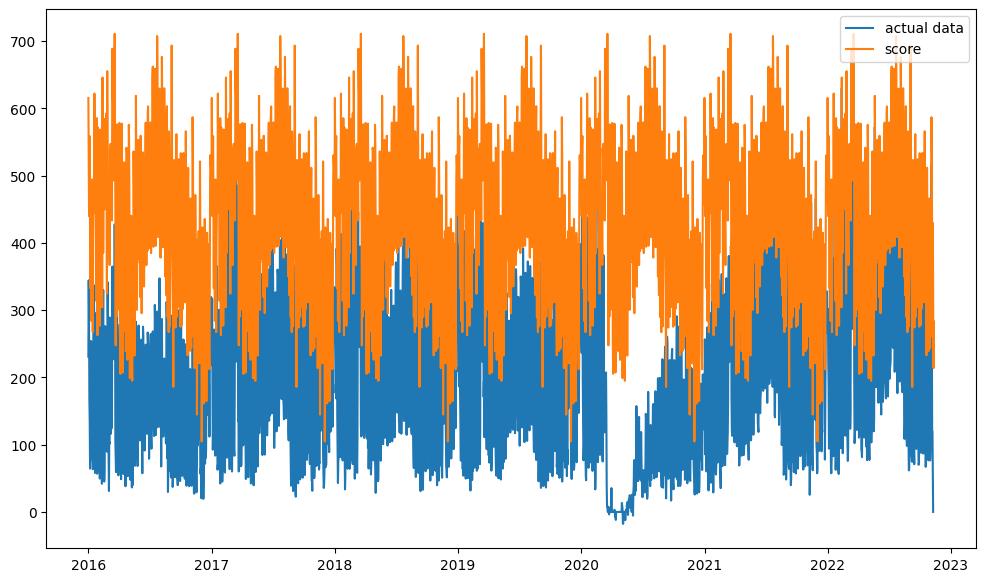

In [164]:
import matplotlib.pyplot as plt

# plot
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.plot(merged_df["value"],label='actual data')
plt.plot(merged_df["eucledian_distance"],label='score')
plt.legend(loc='upper right')
plt.show()